In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

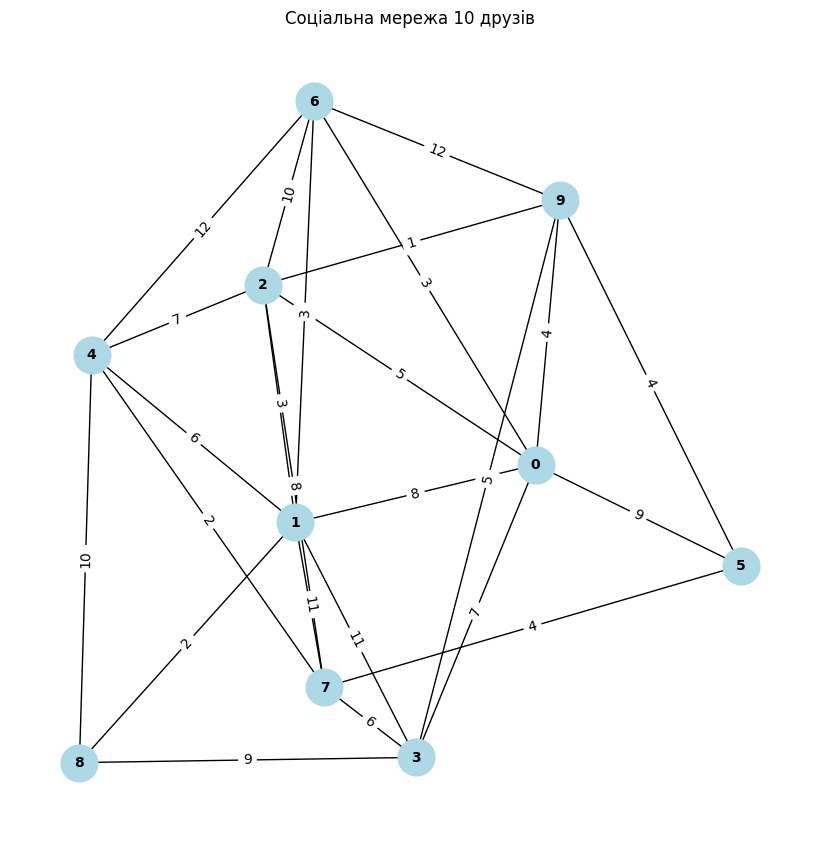

In [4]:
G = nx.Graph()

num_nodes = 10
nodes = range(num_nodes)
G.add_nodes_from(nodes)

edges = [(0, 9), (1, 7), (2, 4), (1, 4), (2, 6), (4, 7), (3, 9), (1, 6), (4, 6), (2, 7),
 (2, 9), (0, 5), (5, 9), (0, 6), (0, 3), (1, 3), (4, 8), (1, 8), (3, 8), (0, 2),
 (3, 7), (0, 1), (5, 7), (1, 2), (6, 9)]

weights = {
    (0, 9): 4,
    (1, 7): 11,
    (2, 4): 7,
    (1, 4): 6,
    (2, 6): 10,
    (4, 7): 2,
    (3, 9): 5,
    (1, 6): 3,
    (4, 6): 12,
    (2, 7): 8,
    (2, 9): 1,
    (0, 5): 9,
    (5, 9): 4,
    (0, 6): 3,
    (0, 3): 7,
    (1, 3): 11,
    (4, 8): 10,
    (1, 8): 2,
    (3, 8): 9,
    (0, 2): 5,
    (3, 7): 6,
    (0, 1): 8,
    (5, 7): 4,
    (1, 2): 3,
    (6, 9): 12
}


G.add_edges_from(edges)

for (u, v) in G.edges():
    G.edges[u, v]['weight'] = weights[(u, v)]

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Соціальна мережа 10 друзів')
plt.show()


In [5]:
# Аналіз основних характеристик графа
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree_sequence = [G.degree(n) for n in G.nodes()]

print(f"Вершин: {num_nodes}")
print(f"Ребер: {num_edges}")
print(f"Ступінь вершин: {degree_sequence}")

Вершин: 10
Ребер: 25
Ступінь вершин: [6, 7, 6, 5, 5, 3, 5, 5, 3, 5]


In [6]:
def dfs(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in set(graph.neighbors(vertex)) - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

def bfs(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in set(graph.neighbors(vertex)) - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

dfs_paths = list(dfs(G, 0, 9))
bfs_paths = list(bfs(G, 0, 9))

print("DFS pathes:", dfs_paths)
print("BFS pathes:", bfs_paths)
print()
print("Другий шлях, знайдений DFS:", dfs_paths[1])
print("Другий шлях, знайдений BFS:", bfs_paths[1])

DFS pathes: [[0, 9], [0, 6, 9], [0, 6, 4, 7, 5, 9], [0, 6, 4, 7, 3, 9], [0, 6, 4, 7, 3, 1, 2, 9], [0, 6, 4, 7, 3, 8, 1, 2, 9], [0, 6, 4, 7, 2, 9], [0, 6, 4, 7, 2, 1, 3, 9], [0, 6, 4, 7, 2, 1, 8, 3, 9], [0, 6, 4, 7, 1, 3, 9], [0, 6, 4, 7, 1, 2, 9], [0, 6, 4, 7, 1, 8, 3, 9], [0, 6, 4, 2, 9], [0, 6, 4, 2, 7, 5, 9], [0, 6, 4, 2, 7, 3, 9], [0, 6, 4, 2, 7, 1, 3, 9], [0, 6, 4, 2, 7, 1, 8, 3, 9], [0, 6, 4, 2, 1, 7, 5, 9], [0, 6, 4, 2, 1, 7, 3, 9], [0, 6, 4, 2, 1, 3, 9], [0, 6, 4, 2, 1, 3, 7, 5, 9], [0, 6, 4, 2, 1, 8, 3, 9], [0, 6, 4, 2, 1, 8, 3, 7, 5, 9], [0, 6, 4, 1, 7, 5, 9], [0, 6, 4, 1, 7, 3, 9], [0, 6, 4, 1, 7, 2, 9], [0, 6, 4, 1, 3, 9], [0, 6, 4, 1, 3, 7, 5, 9], [0, 6, 4, 1, 3, 7, 2, 9], [0, 6, 4, 1, 2, 9], [0, 6, 4, 1, 2, 7, 5, 9], [0, 6, 4, 1, 2, 7, 3, 9], [0, 6, 4, 1, 8, 3, 9], [0, 6, 4, 1, 8, 3, 7, 5, 9], [0, 6, 4, 1, 8, 3, 7, 2, 9], [0, 6, 4, 8, 3, 9], [0, 6, 4, 8, 3, 7, 5, 9], [0, 6, 4, 8, 3, 7, 2, 9], [0, 6, 4, 8, 3, 7, 1, 2, 9], [0, 6, 4, 8, 3, 1, 7, 5, 9], [0, 6, 4, 8, 3, 1, 7, 

# Порівняння

DFS в граф перебирає всі шляхи заглиблюючись в граф (використовуючи стек для зберігання всіх вершин з верхніх рівнів)
Це видно з output бо шляхи перелічені в порядку заглиблення (багато де наступний шлях містить перший як початкок)

BFS перебирає всі сусідні вершини ноди а далі переходить до всіх сусідніх сусідніх вершин (для такого перебору використовується черга)
використовується для швидкого пошуку коротких шляхів оскільки він не заглиблюється і не аналізує все

In [7]:
def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph.nodes()}
    distances[start] = 0
    priority_queue = [(0, start)]

    paths = {node: [] for node in graph.nodes()}
    paths[start] = [start]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, attributes in graph[current_node].items():
            weight = attributes['weight']
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
                paths[neighbor] = paths[current_node] + [neighbor]

    return distances, paths

def full_dijkstra(g):

  nodes = {}
  for vertex_left in range(len(g.nodes())):
    for vertex_right in range(len(g.nodes())):
      if vertex_left == vertex_right:
        continue

      if not (vertex_left, vertex_right) in nodes.keys() and not (vertex_right, vertex_left) in nodes.keys():
        nodes[(vertex_left, vertex_right)] = {'distance': -1, 'path': []}

  for vertex in range(len(g.nodes())):
    distances, pathes = dijkstra(G, vertex)
    for key,data in distances.items():
      if (vertex, key) in nodes.keys():
        nodes[(vertex, key)]['distance'] = data

    for key,data in pathes.items():
      if (vertex, key) in nodes.keys():
        nodes[(vertex, key)]['path'] = data

  return nodes

full_dijkstra(G)

{(0, 1): {'distance': 6, 'path': [0, 6, 1]},
 (0, 2): {'distance': 5, 'path': [0, 2]},
 (0, 3): {'distance': 7, 'path': [0, 3]},
 (0, 4): {'distance': 12, 'path': [0, 2, 4]},
 (0, 5): {'distance': 8, 'path': [0, 9, 5]},
 (0, 6): {'distance': 3, 'path': [0, 6]},
 (0, 7): {'distance': 12, 'path': [0, 9, 5, 7]},
 (0, 8): {'distance': 8, 'path': [0, 6, 1, 8]},
 (0, 9): {'distance': 4, 'path': [0, 9]},
 (1, 2): {'distance': 3, 'path': [1, 2]},
 (1, 3): {'distance': 9, 'path': [1, 2, 9, 3]},
 (1, 4): {'distance': 6, 'path': [1, 4]},
 (1, 5): {'distance': 8, 'path': [1, 2, 9, 5]},
 (1, 6): {'distance': 3, 'path': [1, 6]},
 (1, 7): {'distance': 8, 'path': [1, 4, 7]},
 (1, 8): {'distance': 2, 'path': [1, 8]},
 (1, 9): {'distance': 4, 'path': [1, 2, 9]},
 (2, 3): {'distance': 6, 'path': [2, 9, 3]},
 (2, 4): {'distance': 7, 'path': [2, 4]},
 (2, 5): {'distance': 5, 'path': [2, 9, 5]},
 (2, 6): {'distance': 6, 'path': [2, 1, 6]},
 (2, 7): {'distance': 8, 'path': [2, 7]},
 (2, 8): {'distance': 5, '